In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi
import nibabel as nb
from nighres.io import io_mesh

### Plot sagital slice

In [3]:
regions=np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/v3/regions.npy')
x=np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/v3/x.npy')
y=np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/v3/y.npy')
z=np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/v3/z.npy')

In [4]:
annot = nb.load('/home/julia/data/gradients/atlas/allen_api/annotation.nii.gz').get_data()

In [5]:
x0 = (annot.shape[0])/2*25
y0 = (annot.shape[1])/2*25
z0 = (annot.shape[2])/2*25

In [37]:
z_idx = 250
z_idx_cells = z_idx*25-z0
z_idcs = np.where(np.abs(z-z_idx_cells)<1)

In [40]:
x_img=(x[z_idcs]+x0)/25
y_img=(-y[z_idcs]+y0)/25

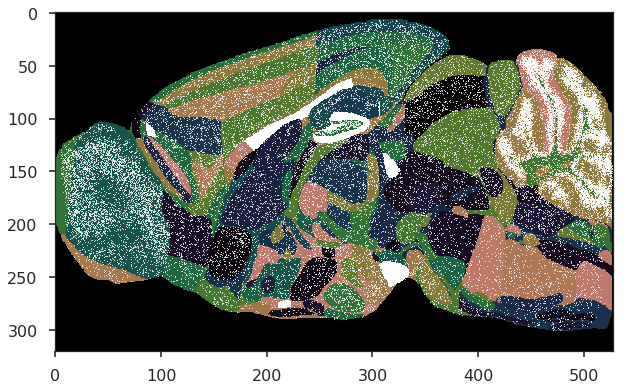

In [41]:
sns.set_context('poster')
fig = plt.figure(figsize=(10,10))
plt.imshow(annot[:,:,z_idx].T,  cmap='cubehelix', aspect='equal', vmin=0, vmax=2000);
plt.scatter(x_img, y_img, marker='.', color='white', s=1);
plt.savefig('test.png')

### Plot on example of DRN

In [7]:
drn_idx = np.where(regions==872)
drn_cells = pd.DataFrame(columns=['x', 'y', 'z'])
drn_cells['x'] = x[drn_idx]
drn_cells['y'] = y[drn_idx]
drn_cells['z'] = z[drn_idx]

In [8]:
drn_img = nb.load('/home/julia/data/gradients/atlas/allen_api/drn.nii.gz').get_data()
drn_mask = np.where(drn_img==1)

/home/julia/workspace/conda/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


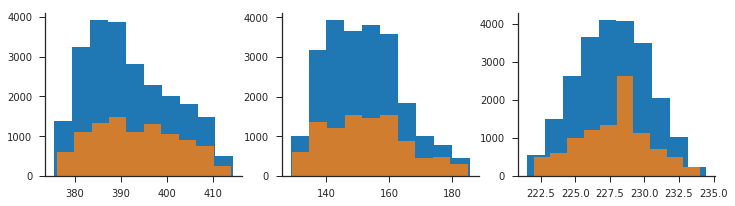

In [9]:
sns.set_style('ticks')
sns.set_context('notebook')
fig = plt.figure(figsize=(12,3))
fig.add_subplot(1,3,1)
plt.hist((drn_cells['x']+x0)/25)
plt.hist(drn_mask[0], alpha=0.8)

fig.add_subplot(1,3,2)
plt.hist((-drn_cells['y']+y0)/25)
plt.hist(drn_mask[1], alpha=0.8)

fig.add_subplot(1,3,3)
plt.hist((drn_cells['z']+z0)/25)
plt.hist(drn_mask[2], alpha=0.8)
sns.despine()

In [76]:
drn_slice = 230
slice_cells_x = (x[drn_idx][np.where(np.abs(((z[drn_idx]+z0)/25)-drn_slice)<1)]+x0)/25
slice_cells_y = (-y[drn_idx][np.where(np.abs(((z[drn_idx]+z0)/25)-drn_slice)<1)]+y0)/25

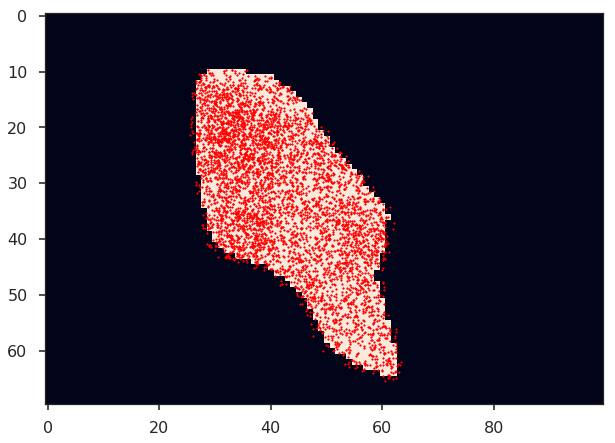

In [77]:
sns.set_context('poster')
fig = plt.figure(figsize=(10,10))
plt.imshow(drn_img[:,:,drn_slice].T[120:190,350:450], aspect='equal');
plt.scatter(slice_cells_x-350, slice_cells_y-120, marker='.', color='red', s=10);

In [58]:
drn_img[:,:,drn_slice].T[:,300:500].shape

(320, 200)

In [87]:
drn_img.shape[2]/2

228.0

In [5]:
def cells2vol(x, y, z, origin=[264, 160, 228], factor=25):
    return x/factor+origin[0], -y/factor+origin[1], z/factor+origin[2]

In [7]:
testx, testy, testz = cells2vol(x[np.where(regions==872)], y[np.where(regions==872)], z[np.where(regions==872)])

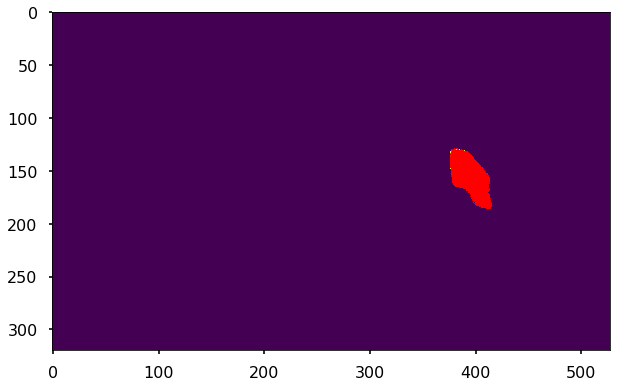

In [12]:
sns.set_context('poster')
fig = plt.figure(figsize=(10,10))
plt.imshow(drn_img[:,:,230].T, aspect='equal');
plt.scatter(testx, testy, marker='.', color='red', s=1);